Tugas Pertemuan ke-20 (Regresi)

Melakukan Forecasting Covid-19 di Indonesia dengan data tanggal 1 Juli 2021 sampai 14 November 2021
untuk memprediksi angka perkembangan kasus baru pada tanggal 15 November 2021 - 14 Desember 2021


In [2]:
# Import liblary yang digunakan!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics

In [3]:
# Viewing dataframe

Covid19 = pd.read_csv("covid_indonesia_2.csv")
Covid19

,Tanggal,Kasus_harian,Total_kasus,Kasus_aktif,Sembuh_baru,Sembuh,Meninggal_baru,Meninggal_Dunia
0,2021-07-01,24836,2203108,253826,9874,1890287,504,58995
1,2021-07-02,25830,2228938,267539,11578,1901865,539,59534
2,2021-07-03,27913,2256851,281677,13282,1915147,493,60027
3,2021-07-04,27233,2284084,295228,13127,1928274,555,60582
4,2021-07-05,29745,2313829,309999,14416,1942690,558,61140
...,...,...,...,...,...,...,...,...
132,2021-11-10,480,4249323,9537,531,4096194,14,143592
133,2021-11-11,435,4249758,9486,470,4096664,16,143608
134,2021-11-12,399,4250157,9305,560,4097224,20,143628
135,2021-11-13,359,4250516,9198,451,4097675,15,143643


In [4]:
# Viewing Data Information
display(Covid19.describe())
display(Covid19.dtypes)

,Kasus_harian,Total_kasus,Kasus_aktif,Sembuh_baru,Sembuh,Meninggal_baru,Meninggal_Dunia
count,137.000000,1.370000e+02,137.000000,137.000000,1.370000e+02,137.000000,137.00000
mean,15128.343066,3.800636e+06,212836.240876,16188.065693,3.467221e+06,621.664234,120578.20438
std,16758.477055,6.121355e+05,201927.468029,15064.380154,7.427454e+05,614.988956,28539.47019
min,244.000000,2.203108e+06,9018.000000,451.000000,1.890287e+06,11.000000,58995.00000
25%,1053.000000,3.532567e+06,22541.000000,1946.000000,2.907920e+06,50.000000,100636.00000
50%,5436.000000,4.140634e+06,138630.000000,12474.000000,3.864848e+06,493.000000,137156.00000
75%,29745.000000,4.228552e+06,380797.000000,29794.000000,4.063295e+06,1128.000000,142716.00000
max,56757.000000,4.250855e+06,574135.000000,48832.000000,4.098178e+06,2069.000000,143659.00000


Tanggal            object
Kasus_harian        int64
Total_kasus         int64
Kasus_aktif         int64
Sembuh_baru         int64
Sembuh              int64
Meninggal_baru      int64
Meninggal_Dunia     int64
dtype: object

In [5]:
Covid19["cases_norm"] = np.log(Covid19["Kasus_harian"])
Covid19

,Tanggal,Kasus_harian,Total_kasus,Kasus_aktif,Sembuh_baru,Sembuh,Meninggal_baru,Meninggal_Dunia,cases_norm
0,2021-07-01,24836,2203108,253826,9874,1890287,504,58995,10.120049
1,2021-07-02,25830,2228938,267539,11578,1901865,539,59534,10.159292
2,2021-07-03,27913,2256851,281677,13282,1915147,493,60027,10.236848
3,2021-07-04,27233,2284084,295228,13127,1928274,555,60582,10.212185
4,2021-07-05,29745,2313829,309999,14416,1942690,558,61140,10.300416
...,...,...,...,...,...,...,...,...,...
132,2021-11-10,480,4249323,9537,531,4096194,14,143592,6.173786
133,2021-11-11,435,4249758,9486,470,4096664,16,143608,6.075346
134,2021-11-12,399,4250157,9305,560,4097224,20,143628,5.988961
135,2021-11-13,359,4250516,9198,451,4097675,15,143643,5.883322


In [6]:
# Data yang dibutuhkan, Kasus & Tanggal
Covid19.loc[:, ["Tanggal", "Kasus_harian"]]

,Tanggal,Kasus_harian
0,2021-07-01,24836
1,2021-07-02,25830
2,2021-07-03,27913
3,2021-07-04,27233
4,2021-07-05,29745
...,...,...
132,2021-11-10,480
133,2021-11-11,435
134,2021-11-12,399
135,2021-11-13,359


In [7]:
Default_Date = pd.to_datetime(Covid19.iloc[0]["Tanggal"])
Default_Date

Timestamp('2021-07-01 00:00:00')

In [8]:
# Mengubah tanggal menjadi Numerik
Covid19['days'] = Covid19["Tanggal"].apply(lambda x: pd.Timedelta(pd.to_datetime(x) - Default_Date).days)
Covid19

,Tanggal,Kasus_harian,Total_kasus,Kasus_aktif,Sembuh_baru,Sembuh,Meninggal_baru,Meninggal_Dunia,cases_norm,days
0,2021-07-01,24836,2203108,253826,9874,1890287,504,58995,10.120049,0
1,2021-07-02,25830,2228938,267539,11578,1901865,539,59534,10.159292,1
2,2021-07-03,27913,2256851,281677,13282,1915147,493,60027,10.236848,2
3,2021-07-04,27233,2284084,295228,13127,1928274,555,60582,10.212185,3
4,2021-07-05,29745,2313829,309999,14416,1942690,558,61140,10.300416,4
...,...,...,...,...,...,...,...,...,...,...
132,2021-11-10,480,4249323,9537,531,4096194,14,143592,6.173786,132
133,2021-11-11,435,4249758,9486,470,4096664,16,143608,6.075346,133
134,2021-11-12,399,4250157,9305,560,4097224,20,143628,5.988961,134
135,2021-11-13,359,4250516,9198,451,4097675,15,143643,5.883322,135


In [9]:
# Dataframe baru
Data = Covid19.iloc[:, 8:10].copy()
Data

,cases_norm,days
0,10.120049,0
1,10.159292,1
2,10.236848,2
3,10.212185,3
4,10.300416,4
...,...,...
132,6.173786,132
133,6.075346,133
134,5.988961,134
135,5.883322,135


In [10]:
# Data Processing

x = np.array(Data["days"]).reshape((-1,1))
y = np.array(Data["cases_norm"])


In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, random_state=42, test_size=0.2)

display(len(X_train))
display(len(X_test))
display(len(Y_train))
display(len(Y_test))

109

28

109

28

In [12]:
# import modul PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X_train)

pol_reg = LinearRegression()
pol_reg.fit(X_poly, Y_train)

LinearRegression()

In [13]:

poly_X_test = poly_reg.fit_transform(X_test)
Y_pred = pol_reg.predict(poly_X_test)

r2 = metrics.r2_score(Y_test, Y_pred)
r2


0.9576332489268025

In [14]:
# prediksi tanggal 15 November 2021 - 14 Desember 2021 (30 hari) dari days 137 - 166
predict_date = np.arange(136, 167).reshape(-1,1)

poly_predict_data = poly_reg.fit_transform(predict_date)
Y_predict_date = pol_reg.predict(poly_predict_data)

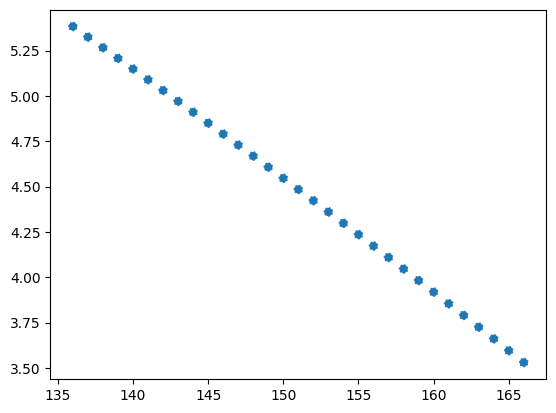

In [15]:
# tampilkan plot dengan predict_date = x dan predict case = y
plt.scatter(predict_date, Y_predict_date, linestyle ='dotted')
plt.show()